In [3]:
import numpy as np
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest
from sklearn.metrics import accuracy_score
import shap 
import matplotlib.pyplot as plt
import seaborn as sb 
from interpret import show
import pandas as pd

from interpret.blackbox import LimeTabular
nltk.download('stopwords')


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
# Load the dataset
df = pd.read_csv('software_requirements_extended.csv')


In [51]:
# Prepare stopwords
stop_words = set(stopwords.words('english'))

# Remove punctuation and stopwords from the 'Requirement' column directly
df['cleaned_requirement'] = df['Requirement'].apply(
    lambda text: ' '.join([word for word in ''.join([char for char in text if char not in string.punctuation]).split() if word.lower() not in stop_words])
)


In [52]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_requirement'], df['Type'], test_size=0.2, random_state=45)


In [53]:
# Create a CountVectorizer to convert words into numeric values
bow_transformer = CountVectorizer().fit(X_train)

# Transform the training data into bag-of-words representation
X_train_bow = bow_transformer.transform(X_train)

# Transform the testing data into bag-of-words representation
X_test_bow = bow_transformer.transform(X_test)


In [54]:
# Use TF-IDF transformer to convert bag-of-words to TF-IDF representation
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_bow)
X_test_tfidf = tfidf_transformer.transform(X_test_bow)


In [55]:
# Train the Random Forest model on training data
rf_model = RandomForestClassifier(random_state=45)  # Instantiate Random Forest Classifier
rf_model.fit(X_train_tfidf, y_train)  # Fit the model on the training data


RandomForestClassifier(random_state=45)

In [56]:
# Make predictions on test data
predictions = rf_model.predict(X_test_tfidf)

# Display the predictions and actual values
print("Predictions: ", predictions)
print("Actual: ", y_test.values)

# Optional: Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Predictions:  ['FR' 'O' 'FR' 'FR' 'SC' 'FR' 'F' 'F' 'F' 'FR' 'F' 'F' 'FR' 'SE' 'LF'
 'NFR' 'FR' 'NFR' 'FR' 'F' 'FR' 'FR' 'PE' 'FR' 'FR' 'PE' 'FR' 'PE' 'US'
 'F' 'F' 'FR' 'F' 'F' 'F' 'F' 'F' 'PE' 'FR' 'FR' 'F' 'PE' 'US' 'FR' 'NFR'
 'FR' 'O' 'NFR' 'SE' 'F' 'FR' 'FR' 'FR' 'FR' 'L' 'F' 'F' 'FR' 'PE' 'FR'
 'F' 'FR' 'FR' 'PE' 'FR' 'FR' 'SE' 'F' 'FR' 'F' 'FR' 'NFR' 'F' 'FR' 'FR'
 'FR' 'FR' 'F' 'PE' 'NFR' 'FR' 'FR' 'O' 'FR' 'F' 'F' 'NFR' 'F' 'F' 'F'
 'SE' 'FR' 'FR' 'FR' 'F' 'FR' 'FR' 'F' 'FR' 'FR' 'FR' 'A' 'F' 'FR' 'FR'
 'LF' 'F' 'FR' 'FR' 'FR' 'FR' 'F' 'FR' 'FR' 'F' 'FR' 'FR' 'NFR' 'FR' 'F'
 'F' 'F' 'FR' 'F' 'US' 'F' 'F' 'O' 'FR' 'FR' 'SE' 'F' 'F' 'F' 'FR' 'F'
 'PE' 'F' 'SE' 'F' 'FR' 'FR' 'FR' 'F' 'US' 'NFR' 'O' 'NFR' 'FR' 'FR' 'NFR'
 'US' 'FR' 'F' 'US' 'FR' 'F' 'FR' 'FR' 'F' 'PE' 'FR' 'F' 'F' 'FR' 'F'
 'NFR' 'FR' 'O' 'F' 'F' 'FR' 'FR' 'PE' 'SE' 'O' 'FR' 'NFR' 'NFR' 'F' 'F'
 'NFR' 'F' 'FR' 'O' 'FR' 'FR' 'FR' 'F' 'FR' 'FR' 'F' 'NFR' 'FR' 'FR' 'US']
Actual:  ['FR' 'US' 'LF' 'FR' 'SC' 'FR' 'F' '

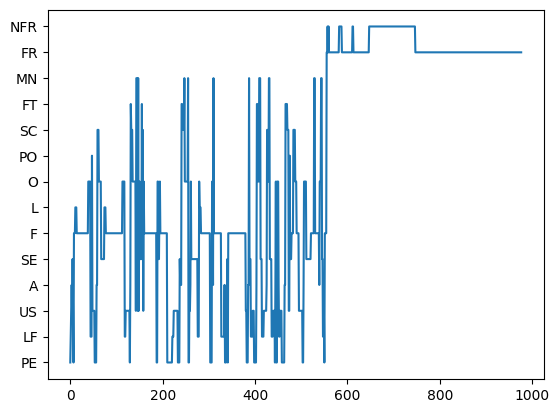

In [12]:
# from interpret.blackbox import LimeTabular
# from interpret import show
import matplotlib.pyplot as plt
data = pd.read_csv('software_requirements_extended.csv')
sb.countplot(data['Type'])



In [ ]:
# lime = LimeTabular